# This is a financial Analyst 
##### It uses function calling to call functions and fetch data from an external api and then the open ai assistant process that data according to the user query and returns the response

In [36]:
#loading env files 

from openai import OpenAI
from dotenv import load_dotenv, find_dotenv
import os
import json 
import requests

_ : bool = load_dotenv(find_dotenv()) # read local .env file

FMP_API_KEY: str | None = os.environ.get("FMP_API_KEY")
OPENAI_API_KEY: str | None = os.environ.get("OPENAI_API_KEY")

# client : OpenAI = OpenAI()

In [37]:
# Define financial statement functions
def get_income_statement(ticker:str, period:str, limit:int)->str:
    url = f"https://financialmodelingprep.com/api/v3/income-statement/{ticker}?period={period}&limit={limit}&apikey={FMP_API_KEY}"
    response = requests.get(url)
    return json.dumps(response.json())



def get_balance_sheet(ticker:str, period:str, limit:int)->str:
    url = f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{ticker}?period={period}&limit={limit}&apikey={FMP_API_KEY}"
    response = requests.get(url)
    return json.dumps(response.json())


    
def get_cash_flow_statement(ticker:str, period:str, limit:int)->str:
    url = f"https://financialmodelingprep.com/api/v3/cash-flow-statement/{ticker}?period={period}&limit={limit}&apikey={FMP_API_KEY}"
    response = requests.get(url)
    return json.dumps(response.json())



def get_key_metrics(ticker:str, period:str, limit:int)->str:
    url = f"https://financialmodelingprep.com/api/v3/key-metrics/{ticker}?period={period}&limit={limit}&apikey={FMP_API_KEY}"
    response = requests.get(url)
    return json.dumps(response.json())



def get_financial_ratios(ticker:str, period:str, limit:int)->str:
    url = f"https://financialmodelingprep.com/api/v3/ratios-ttm/{ticker}?period={period}&limit={limit}&apikey={FMP_API_KEY}"
    response = requests.get(url)
    return json.dumps(response.json())



def get_financial_growth(ticker:str, period:str, limit:int)->str:
    url = f"https://financialmodelingprep.com/api/v3/financial-growth/{ticker}?period={period}&limit={limit}&apikey={FMP_API_KEY}"
    response = requests.get(url)
    return json.dumps(response.json())

In [38]:

available_functions = {
    "get_income_statement": get_income_statement,
    "get_balance_sheet": get_balance_sheet,
    "get_cash_flow_statement": get_cash_flow_statement,
    "get_key_metrics": get_key_metrics,
    "get_financial_ratios": get_cash_flow_statement,
    "get_financial_growth": get_financial_ratios
}

In [39]:
from typing import List
from openai.types.beta.assistant_create_params import Tool

# create an array of Tools objects
tools : List[Tool]  = [
    {"type": "code_interpreter"},
    {
        "type": "function",
        "function": {
            "name": "get_income_statement",
            "parameters": {
                "type": "object",
                "properties": {
                    "ticker": { "type": "string" },
                    "period": { "type": "string" },
                    "limit": { "type": "integer" }
                }
            }
        }
    },
    {
        "type": "function",
        "function": {
            "name": "get_balance_sheet",
            "parameters": {
                "type": "object",
                "properties": {
                    "ticker": { "type": "string" },
                    "period": { "type": "string" },
                    "limit": { "type": "integer" }
                }
            }
        }
    },
    {
        "type": "function",
        "function": {
            "name": "get_cash_flow_statement",
            "parameters": {
                "type": "object",
                "properties": {
                    "ticker": { "type": "string" },
                    "period": { "type": "string" },
                    "limit": { "type": "integer" }
                }
            }
        }
    },
    {
        "type": "function",
        "function": {
            "name": "get_key_metrics",
            "parameters": {
                "type": "object",
                "properties": {
                    "ticker": { "type": "string" },
                    "period": { "type": "string" },
                    "limit": { "type": "integer" }
                }
            }
        }
    },
    {
        "type": "function",
        "function": {
            "name": "get_financial_ratios",
            "parameters": {
                "type": "object",
                "properties": {
                    "ticker": { "type": "string" },
                    "period": { "type": "string" },
                    "limit": { "type": "integer" }
                }
            }
        }
    },
    {
        "type": "function",
        "function": {
            "name": "get_financial_growth",
            "parameters": {
                "type": "object",
                "properties": {
                    "ticker": { "type": "string" },
                    "period": { "type": "string" },
                    "limit": { "type": "integer" }
                }
            }
        }
    },

]

In [40]:
from openai.types.beta.assistant import Assistant
from openai.types.beta.thread import Thread
from openai.types.beta.threads.thread_message import ThreadMessage
from openai.types.beta.threads.run import Run
from typing import Literal, List
import time 
from openai.types.beta.threads.required_action_function_tool_call import (
    RequiredActionFunctionToolCall,
)
from openai.types.beta.threads.run_submit_tool_outputs_params import ToolOutput


class FinancialAssistantManager:
    # constructor
    def __init__(self, model: str = "gpt-3.5-turbo-1106"):
        self.client : OpenAI = OpenAI()
        self.model = model
        self.assistant: Assistant
        self.thread: Thread
        self.message: ThreadMessage
        self.run: Run
    
    # creating an assistant
    def create_assistant(
        self, name: str, instructions: str, tools: List[Tool]
    ) -> Assistant:
        self.assistant = self.client.beta.assistants.create(
            name=name, instructions=instructions, tools=tools, model=self.model
        )
        return self.assistant
    
    # retrieve an assistant
    def retrieve_assistant(
        self, id: str
    ) -> Assistant:
        self.assistant = self.client.beta.assistants.retrieve(
            assistant_id=id
        )
        return self.assistant
    
    # create a new thread
    def create_thread(self) -> Thread:
        self.thread = self.client.beta.threads.create()
        return self.thread
    
    # create a new message
    def add_message_to_thread(self, role: Literal["user"], content: str) -> None:
        self.message = self.client.beta.threads.messages.create(
            thread_id=self.thread.id, role=role, content=content
        )
    
    # retrieve all the messages in a thread
    def get_all_messages(self):
        messages = self.client.beta.threads.messages.list(thread_id=self.thread.id)
        return messages
    
    # running the assistant 
    def run_assistant(self) -> Run:
        self.run = self.client.beta.threads.runs.create(
            thread_id=self.thread.id,
            assistant_id=self.assistant.id,
        )
        return self.run
    
    # if status of run in "required_action then run this to call the functions and submit the results to run again"
    def call_required_functions(
        self, required_actions: List[RequiredActionFunctionToolCall]
    ) -> None:
        tool_outputs: List[ToolOutput] = []

        for action in required_actions:
            function_name = action.function.name
            arguments = json.loads(action.function.arguments)
            print("function_name", function_name)
            print("function_arguments", arguments)

            if function_name in available_functions:
                function_to_call = available_functions[function_name]
                output = function_to_call(**arguments)
                tool_outputs.append(
                    {
                        "tool_call_id": action.id,
                        "output": output,
                    }
                )

            else:
                raise ValueError(f"Unknown function: {function_name}")

        print("Submitting outputs back to the Assistant...")
        self.client.beta.threads.runs.submit_tool_outputs(
            thread_id=self.thread.id, run_id=self.run.id, tool_outputs=tool_outputs
        )

    #   wait for completion of the run 
    def wait_for_completion(self, run: Run):
        while run.status not in ["completed", "failed"]:
            run_status = self.client.beta.threads.runs.retrieve(
                thread_id=self.thread.id, run_id=self.run.id
            )
            print(f"Run is {run.status}. Waiting...")
            time.sleep(3)  # Wait for 3 seconds before checking again

            if run_status.status == "completed":
                print("run completed successfully")
                processed_response = self.get_all_messages()
                return processed_response

            elif run_status.status == "requires_action":
                print("Function Calling ...")
                if run_status.required_action: # call the function which will call all the tools and return tools output                    
                        self.call_required_functions(
                            run_status.required_action.submit_tool_outputs.tool_calls
                        )
            elif run.status == "failed":
                print("Run failed.")
                break
            else:
                print(f"Waiting for the Assistant to process...: {run.status}")


In [41]:
import requests
from PIL import Image
from IPython.display import Image

# download and save the image from open ai output

def download_and_save_image(file_id: str, save_path: str) -> None:
    print("function of image called")
    # Download an image from OpenAI using its file ID and saves it to the specified path.
    
    # Construct the URL to download the image
    download_url = f"https://api.openai.com/v1/files/{file_id}/content"

    # Perform the HTTP GET request to download the image
    response = requests.get(
        download_url, headers={"Authorization": f"Bearer {OPENAI_API_KEY}"}
    )

    # Check if the request was successful
    if response.status_code == 200:
        # Write the image to the specified file
        with open(save_path, "wb") as file:
            file.write(response.content)
        print(f"Image downloaded and saved to {save_path}")
    else:
        print(f"Failed to download image: HTTP Status Code {response.status_code}")

In [50]:
from typing import Any

# this function will return a formatted output from the json recieved from the response of openai

def show_formatted_output(obj: Any) -> None:
    data = json.loads(obj.model_dump_json())["data"]
    try:
        for message in reversed(data):
            role_label = "User" if message["role"] == "user" else "Assistant"
            for content in message["content"]:
                if content["type"] == "text":
                    message_content = content["text"]["value"]
                    print(f"{role_label}: {message_content}\n")
                elif content["type"] == "image_file":
                    # Handle image file content, e.g., print the file ID or download the image
                    image_file_id = content["image_file"]["file_id"]
                    # Define a path to save the image
                    image_save_path = f"image_{image_file_id}.png"
                    # Download and save the image
                    print(f"{role_label}: Image file ID: {image_file_id}")
                    download_and_save_image(image_file_id, image_save_path)
                    # Display the image within Jupyter Notebook
                    display(Image(filename=image_save_path)) # type: ignore
        # display(data)
    except (AttributeError, json.JSONDecodeError, TypeError) as e:
        print(f"Error displaying JSON: {e}")




In [42]:
# creating an instance of of FinancialAssistantManager class


my_assistant = FinancialAssistantManager()

In [43]:
# creating first financial assistant
my_assistant.create_assistant(
    name="Financial Analyst",
    instructions="Act as a financial analyst by accessing financial data through the Financial Modeling Prep API. Your capabilities include analyzing key metrics, comprehensive financial statements, vital financial ratios, and tracking financial growth trends",
    tools=tools,
)

Assistant(id='asst_gQJNQjsbnICZRSjexavpm4KT', created_at=1703523762, description=None, file_ids=[], instructions='Act as a financial analyst by accessing financial data through the Financial Modeling Prep API. Your capabilities include analyzing key metrics, comprehensive financial statements, vital financial ratios, and tracking financial growth trends', metadata={}, model='gpt-3.5-turbo-1106', name='Financial Analyst', object='assistant', tools=[ToolCodeInterpreter(type='code_interpreter'), ToolFunction(function=FunctionDefinition(name='get_income_statement', parameters={'type': 'object', 'properties': {'ticker': {'type': 'string'}, 'period': {'type': 'string'}, 'limit': {'type': 'integer'}}}, description=None), type='function'), ToolFunction(function=FunctionDefinition(name='get_balance_sheet', parameters={'type': 'object', 'properties': {'ticker': {'type': 'string'}, 'period': {'type': 'string'}, 'limit': {'type': 'integer'}}}, description=None), type='function'), ToolFunction(func

In [44]:
# creating a thread

my_assistant.create_thread()

Thread(id='thread_0iXuhEgm7fzWQ69g2RtYaWsr', created_at=1703523766, metadata={}, object='thread')

In [45]:
# adding our message

my_assistant.add_message_to_thread(role="user", content="Can you compare the financial health of Microsoft and Apple over the last 2 years, focusing on their balance sheets and key financial ratios?")

In [46]:
# creating a run 

run_assistant = my_assistant.run_assistant()

In [49]:
# retrieving the run and waiting for the response
response = my_assistant.wait_for_completion(run=run_assistant)


Run is queued. Waiting...


SyncCursorPage[ThreadMessage](data=[ThreadMessage(id='msg_mqzQdm1aX8uhUtgo2cHMu4cI', assistant_id='asst_gQJNQjsbnICZRSjexavpm4KT', content=[MessageContentText(text=Text(annotations=[], value="The financial data for the balance sheets and key financial ratios of Microsoft (MSFT) and Apple (AAPL) for the last 2 years is as follows:\n\n### Microsoft Balance Sheet\n- **2023**:\n  - Total Assets: $411,976,000,000\n  - Total Liabilities: $205,753,000,000\n  - Total Equity: $206,223,000,000\n- **2022**:\n  - Total Assets: $364,840,000,000\n  - Total Liabilities: $198,298,000,000\n  - Total Equity: $166,542,000,000\n\n### Apple Balance Sheet\n- **2023**:\n  - Total Assets: $352,583,000,000\n  - Total Liabilities: $290,437,000,000\n  - Total Equity: $62,146,000,000\n- **2022**:\n  - Total Assets: $352,755,000,000\n  - Total Liabilities: $302,083,000,000\n  - Total Equity: $50,672,000,000\n\n### Microsoft Financial Ratios\n- **2023**:\n  - Debt to Equity Ratio: 1.91\n  - Current Ratio: 1.77\n- *

In [51]:
# show output 

show_formatted_output(response)

User: Can you compare the financial health of Microsoft and Apple over the last 2 years, focusing on their balance sheets and key financial ratios?

Assistant: The financial data for the balance sheets and key financial ratios of Microsoft (MSFT) and Apple (AAPL) for the last 2 years is as follows:

### Microsoft Balance Sheet
- **2023**:
  - Total Assets: $411,976,000,000
  - Total Liabilities: $205,753,000,000
  - Total Equity: $206,223,000,000
- **2022**:
  - Total Assets: $364,840,000,000
  - Total Liabilities: $198,298,000,000
  - Total Equity: $166,542,000,000

### Apple Balance Sheet
- **2023**:
  - Total Assets: $352,583,000,000
  - Total Liabilities: $290,437,000,000
  - Total Equity: $62,146,000,000
- **2022**:
  - Total Assets: $352,755,000,000
  - Total Liabilities: $302,083,000,000
  - Total Equity: $50,672,000,000

### Microsoft Financial Ratios
- **2023**:
  - Debt to Equity Ratio: 1.91
  - Current Ratio: 1.77
- **2022**:
  - Debt to Equity Ratio: 1.19
  - Current Ratio:

In [52]:
# now displaying the financial report with images
 
# first add a new message to the thread
my_assistant.add_message_to_thread(
    role="user", content="Now Visualize the results with one or more charts."
)


# next run the assistant again 
run_assistant = my_assistant.run_assistant()

# then wait for the response to complete
response = my_assistant.wait_for_completion(run=run_assistant)


Run is queued. Waiting...
Waiting for the Assistant to process...: queued
Run is queued. Waiting...
Waiting for the Assistant to process...: queued
Run is queued. Waiting...
Waiting for the Assistant to process...: queued
Run is queued. Waiting...
Waiting for the Assistant to process...: queued
Run is queued. Waiting...
Waiting for the Assistant to process...: queued
Run is queued. Waiting...
Waiting for the Assistant to process...: queued
Run is queued. Waiting...
Waiting for the Assistant to process...: queued
Run is queued. Waiting...
Waiting for the Assistant to process...: queued
Run is queued. Waiting...


User: Can you compare the financial health of Microsoft and Apple over the last 2 years, focusing on their balance sheets and key financial ratios?

Assistant: The financial data for the balance sheets and key financial ratios of Microsoft (MSFT) and Apple (AAPL) for the last 2 years is as follows:

### Microsoft Balance Sheet
- **2023**:
  - Total Assets: $411,976,000,000
  - Total Liabilities: $205,753,000,000
  - Total Equity: $206,223,000,000
- **2022**:
  - Total Assets: $364,840,000,000
  - Total Liabilities: $198,298,000,000
  - Total Equity: $166,542,000,000

### Apple Balance Sheet
- **2023**:
  - Total Assets: $352,583,000,000
  - Total Liabilities: $290,437,000,000
  - Total Equity: $62,146,000,000
- **2022**:
  - Total Assets: $352,755,000,000
  - Total Liabilities: $302,083,000,000
  - Total Equity: $50,672,000,000

### Microsoft Financial Ratios
- **2023**:
  - Debt to Equity Ratio: 1.91
  - Current Ratio: 1.77
- **2022**:
  - Debt to Equity Ratio: 1.19
  - Current Ratio:

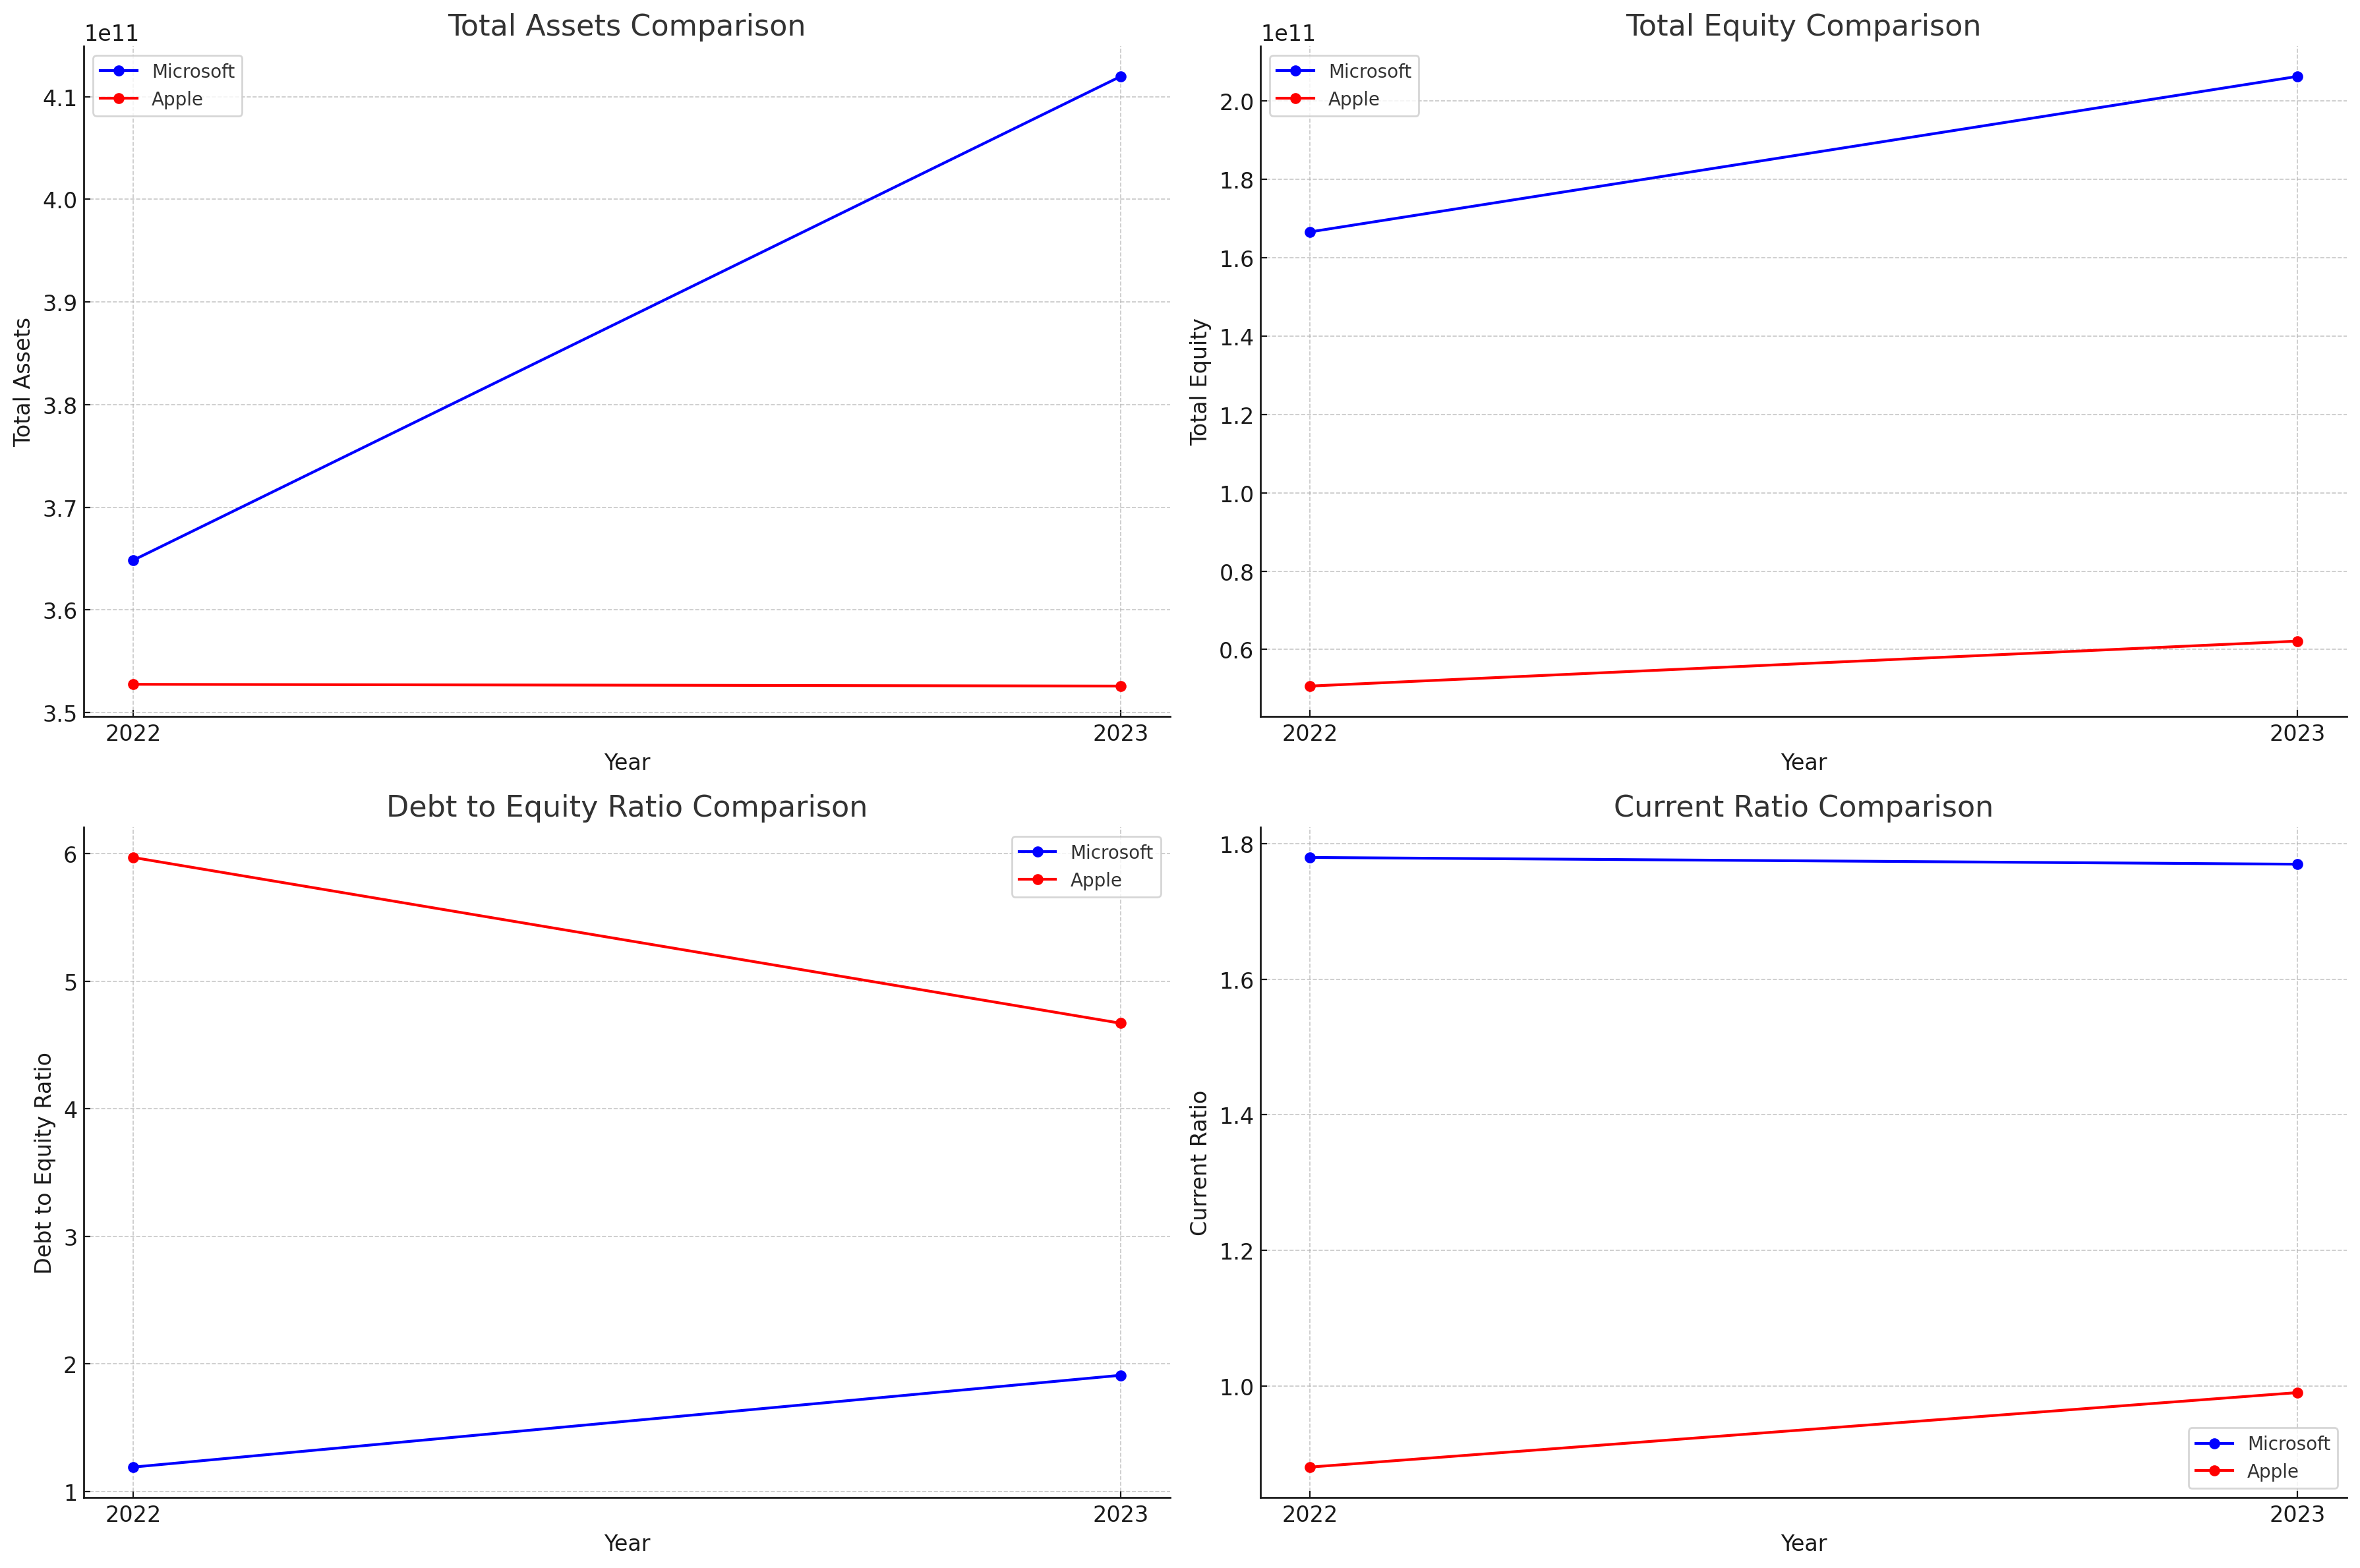

Assistant: Here are the visual comparisons of the financial data for Microsoft and Apple over the last 2 years:

1. Total Assets: Microsoft's total assets have increased consistently over the 2 years, while Apple's total assets remained relatively stable.

2. Total Equity: Both Microsoft and Apple have shown an increase in total equity over the 2 years, with Microsoft's total equity exceeding that of Apple.

3. Debt to Equity Ratio: Apple's debt to equity ratio has decreased from 2022 to 2023, while Microsoft's remained relatively stable and lower than Apple's.

4. Current Ratio: Both companies have maintained their current ratios, with Microsoft's current ratio remaining higher than Apple's.

These charts provide a clear comparison of the financial health of Microsoft and Apple over the last 2 years. If you have any further analysis or specific focus areas in mind, feel free to let me know!



In [53]:
#Display the final results  
show_formatted_output(response)